In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("filter_df.csv")
df_org = pd.read_csv("filter_df1.csv")
print(df_org.head())

   Unnamed: 0             business_id  review_count  useful  stars_review   
0           1  25Uww0C0wvF9CZ_3B6vWtA            48       0             5  \
1           2  rbT-MIIvpSQYmnADue9xKA           292       0             3   
2           3  pkOA1CkXFF_bRpnjrp5PYg            84       3             5   
3           4  V2cQOeZwPBmjpln6_p1Ygw           297       0             2   
4           5  2KWdqoTYBTpBq-Rlb4sR5w           262       0             5   

                                                text  
0  We love the experience with the Enjoy the Moun...  
1  The hotel is nice and the room was clean and c...  
2  Wow! These were the cheapest and most accommod...  
3  Nothing to see or do here. Food looked unappet...  
4  Great location and service.  Clean rooms.  Goo...  


In [2]:
import nltk
import re
import ssl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer


ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mumumumu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mumumumu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mumumumu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mumumumu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk
from nltk import word_tokenize, pos_tag

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\b\w\b', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

df_org['text'] = df_org['text'].apply(preprocess_text)

In [4]:
print(df_org.head())

   Unnamed: 0             business_id  review_count  useful  stars_review   
0           1  25Uww0C0wvF9CZ_3B6vWtA            48       0             5  \
1           2  rbT-MIIvpSQYmnADue9xKA           292       0             3   
2           3  pkOA1CkXFF_bRpnjrp5PYg            84       3             5   
3           4  V2cQOeZwPBmjpln6_p1Ygw           297       0             2   
4           5  2KWdqoTYBTpBq-Rlb4sR5w           262       0             5   

                                                text  
0  love experience enjoy mountain team jorge sylv...  
1  hotel nice room clean comfortable big issue sw...  
2  wow cheapest accommodating limo company contac...  
3  nothing see food looked unappetizing restauran...  
4  great location service clean room good coffee ...  


In [5]:
print(df.head())

   Unnamed: 0             business_id  review_count  stars_review   
0         118  ZZQs5sQpWnYOfolSb3CXMA           122             3  \
1         235  ZZQs5sQpWnYOfolSb3CXMA           122             5   
2         743  ZZQs5sQpWnYOfolSb3CXMA           122             1   
3        1711  ZZQs5sQpWnYOfolSb3CXMA           122             5   
4        1795  ZZQs5sQpWnYOfolSb3CXMA           122             4   

                                                text  sentiment   
0  c("newli", "renov", "hotel", "near", "good", "...   0.292925  \
1  c("great", "place", "stay", "came", "weekend",...   0.797382   
2  c("realli", "disappoint", "compani", "polici",...  -0.173506   
3  c("took", "train", "santa", "barbara", "day", ...   0.339193   
4  c("place", "realli", "well", "locat", "close",...   0.515186   

  sentiment_label  
0        positive  
1        positive  
2        negative  
3        positive  
4        positive  


In [4]:
df_org['text'] = df_org['text'].astype(str)
df_org['nouns'] = df_org['text'].apply(lambda x: ' '.join([word for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN')]))
df_org['adj'] = df_org['text'].apply(lambda x: ' '.join([word for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ')]))

In [7]:
print(df_org.head())

   Unnamed: 0             business_id  review_count  useful  stars_review   
0           1  25Uww0C0wvF9CZ_3B6vWtA            48       0             5  \
1           2  rbT-MIIvpSQYmnADue9xKA           292       0             3   
2           3  pkOA1CkXFF_bRpnjrp5PYg            84       3             5   
3           4  V2cQOeZwPBmjpln6_p1Ygw           297       0             2   
4           5  2KWdqoTYBTpBq-Rlb4sR5w           262       0             5   

                                                text   
0  love experience enjoy mountain team jorge sylv...  \
1  hotel nice room clean comfortable big issue sw...   
2  wow cheapest accommodating limo company contac...   
3  nothing see food looked unappetizing restauran...   
4  great location service clean room good coffee ...   

                                               nouns   
0  experience enjoy mountain team jorge sylvia cr...  \
1  hotel room clean issue pool jacuzzi im jacuzzi...   
2  wow company thing limo bus dr

In [5]:
df2 = pd.concat([df_org['nouns'], df_org['adj'], df['sentiment_label']], axis=1)

In [7]:
print(df2.head())

                                               nouns   
0  experience enjoy mountain team jorge sylvia cr...  \
1  hotel room clean issue pool jacuzzi im jacuzzi...   
2  wow company thing limo bus driver chris wine t...   
3  nothing food restaurant car drive wharf feelin...   
4            location service room coffee everything   

                                                 adj sentiment_label  
0                                  atvs safe watched        positive  
1  nice comfortable big small small different ive...        positive  
2  cheapest limo cheapest isnt good great fantast...        negative  
3  unappetizing scenic whimsical fish breeze nice...        positive  
4                             great clean good quiet        positive  


In [6]:
pos_row = df2[df2['sentiment_label'] == 'positive']
neg_row = df2[df2['sentiment_label'] == 'negative']
pos_adj= ' '.join(pos_row['adj'])
neg_adj= ' '.join(neg_row['adj'])
pos_nouns= ' '.join(pos_row['nouns'])
neg_nouns= ' '.join(neg_row['nouns'])

In [7]:
pos_adj = re.sub(r'\b\w\b', '', pos_adj)
words_to_remove = ['u','santa','guest']
for word in words_to_remove:
    pos_adj = re.sub(r'\b' + re.escape(word) + r'\b', '',pos_adj , flags=re.IGNORECASE)
pos_adj = pos_adj.split()

neg_adj = re.sub(r'\b\w\b', '', neg_adj)
words_to_remove = ['u','santa','guest']
for word in words_to_remove:
    pos_adj = re.sub(r'\b' + re.escape(word) + r'\b', '',neg_adj , flags=re.IGNORECASE)
neg_adj = neg_adj.split()

neg_nouns = re.sub(r'\b\w\b', '', neg_nouns)
words_to_remove = ['santa', 'barbara','stay','didnt']
for word in words_to_remove:
    neg_nouns = re.sub(r'\b' + re.escape(word) + r'\b', '',neg_nouns , flags=re.IGNORECASE)
neg_nouns = neg_nouns.split()

pos_nouns = re.sub(r'\b\w\b', '', pos_nouns)
for word in words_to_remove:
    pos_nouns = re.sub(r'\b' + re.escape(word) + r'\b', '',pos_nouns , flags=re.IGNORECASE)
pos_nouns = pos_nouns.split()

In [8]:
from collections import Counter
pos_nouns_freq = Counter(pos_nouns)
neg_nouns_freq = Counter(neg_nouns)
pos_adj_freq = Counter(pos_adj)
neg_adj_freq = Counter(neg_adj)


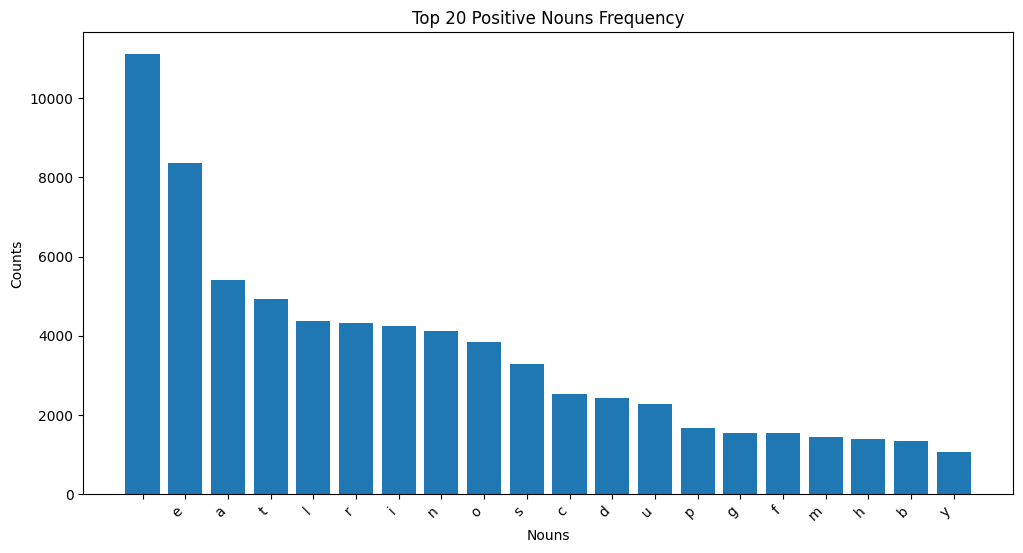

In [11]:
words, counts = zip(*pos_adj_freq.items())

sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k], reverse=True)
sorted_words = [words[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

top_words = sorted_words[:20]
top_counts = sorted_counts[:20]

plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Nouns')
plt.ylabel('Counts')
plt.title('Top 20 Positive Nouns Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top 20 Positive Nouns Frequency.png', format='png', dpi=300)

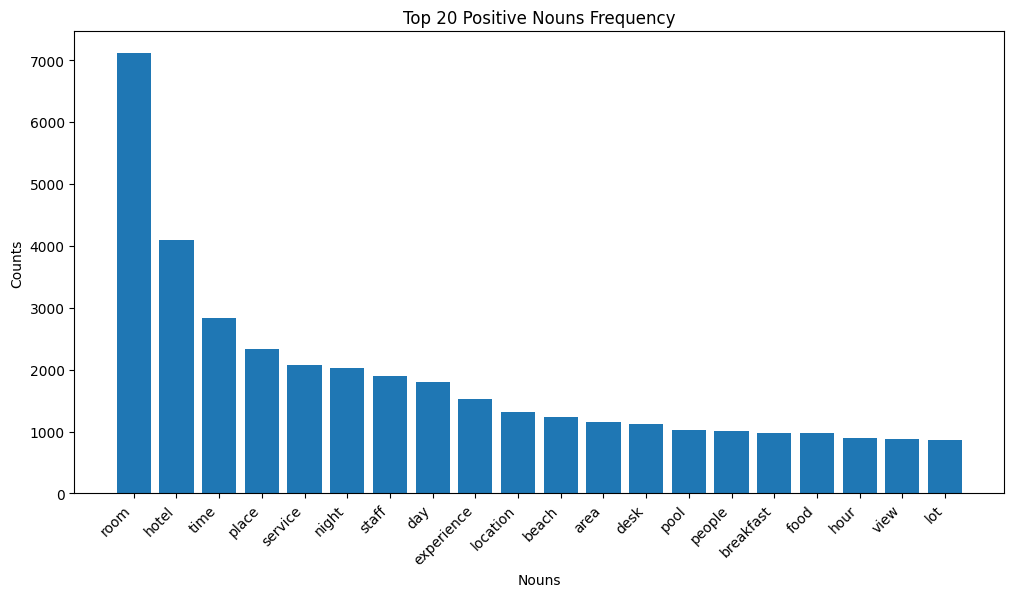

In [12]:
words, counts = zip(*pos_nouns_freq.items())

sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k], reverse=True)
sorted_words = [words[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

top_words = sorted_words[:20]
top_counts = sorted_counts[:20]

plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Nouns')
plt.ylabel('Counts')
plt.title('Top 20 Positive Nouns Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top 20 Positive Nouns Frequency.png', format='png', dpi=300)

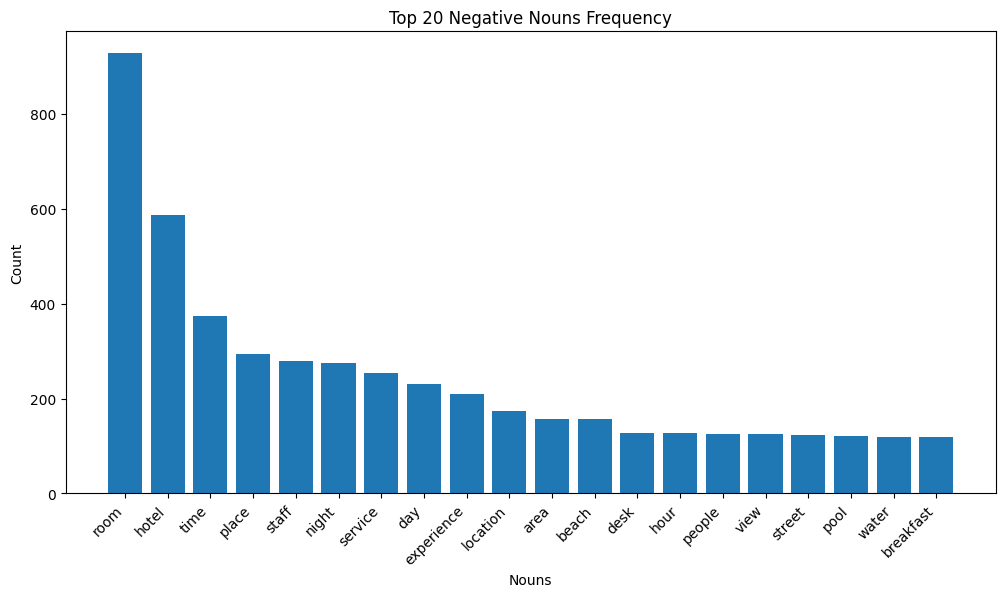

In [27]:
words, counts = zip(*neg_nouns_freq.items())

sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k], reverse=True)
sorted_words = [words[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

top_words = sorted_words[:20]
top_counts = sorted_counts[:20]

plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Nouns')
plt.ylabel('Count')
plt.title('Top 20 Negative Nouns Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top 20 Negative Nouns Frequency.png', format='png', dpi=300)

In [9]:
from wordcloud import WordCloud
df3 = pd.concat([df_org['text'], df['sentiment_label']], axis=1)

In [10]:
postive_text = df3[df3['sentiment_label'] == 'positive']
negative_text = df3[df3['sentiment_label'] == 'negative']

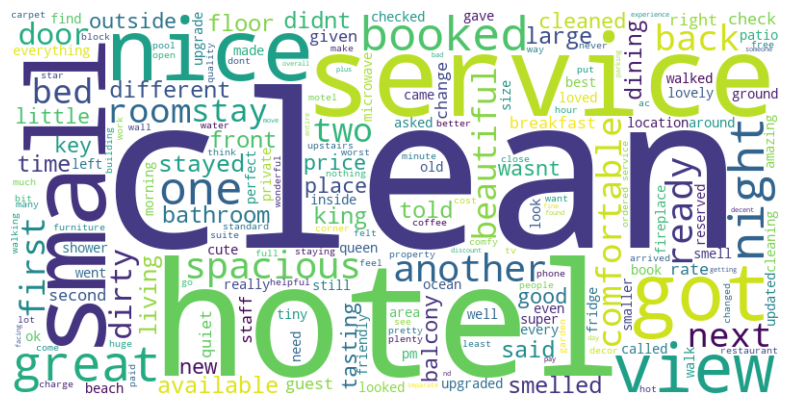

In [11]:
room_around_words = []
for comment in postive_text['text']:
    matches = re.findall(r'\b(\w+)\s+room\s+(\w+)\b', comment)
    if matches:
        room_around_words.extend(matches)

room_around_text = ' '.join([' '.join(match) for match in room_around_words])
words_to_remove = ['santa','barbara','u']
for word in words_to_remove:
    room_around_text = re.sub(r'\b' + re.escape(word) + r'\b', '',room_around_text , flags=re.IGNORECASE)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(room_around_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Room_character.png', format='png', dpi=300)

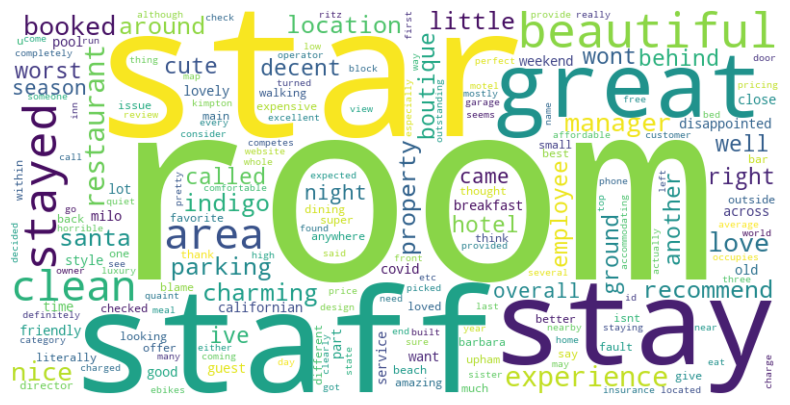

In [23]:
hotel_around_words = []
for comment in negative_text['text']:
    matches = re.findall(r'\b(\w+)\s+hotel\s+(\w+)\b', comment)
    if matches:
        hotel_around_words.extend(matches)

hotel_around_text = ' '.join([' '.join(match) for match in hotel_around_words])
words_to_remove = ['santa','barbara','u']
for word in words_to_remove:
    room_around_text = re.sub(r'\b' + re.escape(word) + r'\b', '',hotel_around_text , flags=re.IGNORECASE)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hotel_around_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Hotel character.png', format='png', dpi=300)

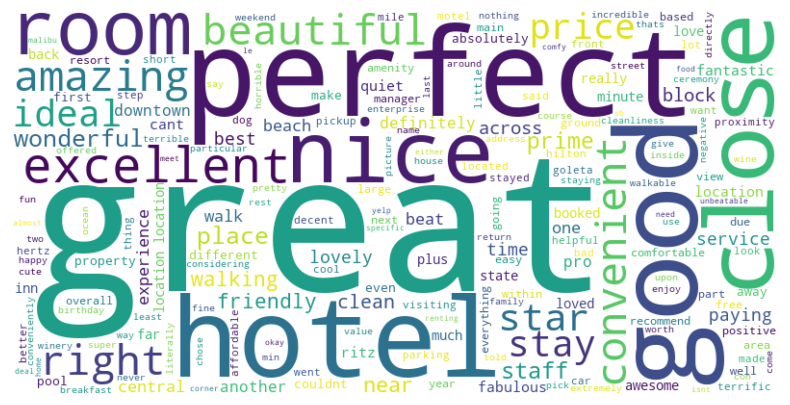

In [25]:
location_around_words = []
for comment in postive_text['text']:
    matches = re.findall(r'\b(\w+)\s+location\s+(\w+)\b', comment)
    if matches:
        location_around_words.extend(matches)

location_around_text = ' '.join([' '.join(match) for match in location_around_words])
words_to_remove = ['santa','barbara','u']
for word in words_to_remove:
    location_around_text = re.sub(r'\b' + re.escape(word) + r'\b', '',location_around_text , flags=re.IGNORECASE)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_around_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Location character.png', format='png', dpi=300)

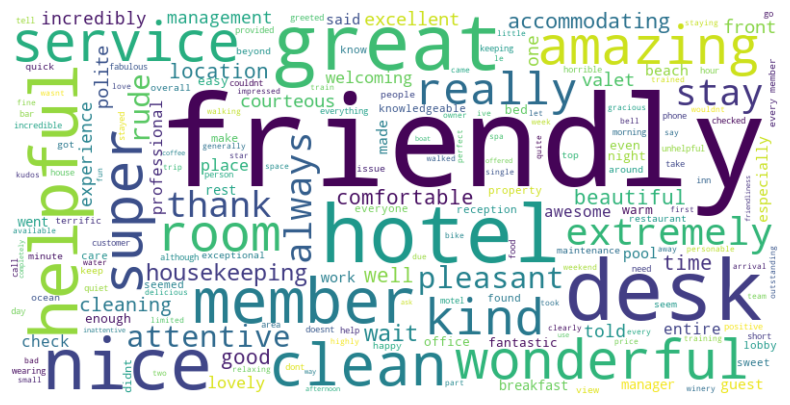

In [26]:
staff_around_words = []
for comment in postive_text['text']:
    matches = re.findall(r'\b(\w+)\s+staff\s+(\w+)\b', comment)
    if matches:
        staff_around_words.extend(matches)

staff_around_text = ' '.join([' '.join(match) for match in staff_around_words])
words_to_remove = ['santa','barbara','u']
for word in words_to_remove:
    staff_around_text = re.sub(r'\b' + re.escape(word) + r'\b', '',staff_around_text , flags=re.IGNORECASE)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(staff_around_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Staff character.png', format='png', dpi=300)

In [106]:
from gensim import corpora, models
room_around_words = []
for comment in postive_text['text']:
    matches = re.findall(r'\b(\w+)\s+room\s+(\w+)\b', comment)
    if matches:
        room_around_words.extend(matches)

room_around_text = ' '.join([' '.join(match) for match in room_around_words])
words_to_remove = ['santa','barbara','u']
for word in words_to_remove:
    room_around_text = re.sub(r'\b' + re.escape(word) + r'\b', '',room_around_text , flags=re.IGNORECASE)

stop_words = set(stopwords.words('english'))
texts = [[word for word in word_tokenize(' '.join(match).lower()) if word.isalpha() and word not in stop_words] for match in room_around_words]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.020*"got" + 0.019*"view" + 0.019*"get" + 0.018*"booked" + 0.015*"another"')
(1, '0.060*"clean" + 0.030*"service" + 0.023*"small" + 0.013*"night" + 0.011*"two"')
(2, '0.020*"great" + 0.015*"ready" + 0.015*"back" + 0.014*"next" + 0.014*"room"')
